In [126]:
#import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [127]:
# csv

diabetes = pd.read_csv('C:/Users/jycha/Downloads/diabetes.csv')

In [128]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [129]:
# DataFrame

df = pd.DataFrame(data=diabetes, columns=diabetes.columns)

In [130]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [131]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [132]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [133]:
df.shape

(768, 9)

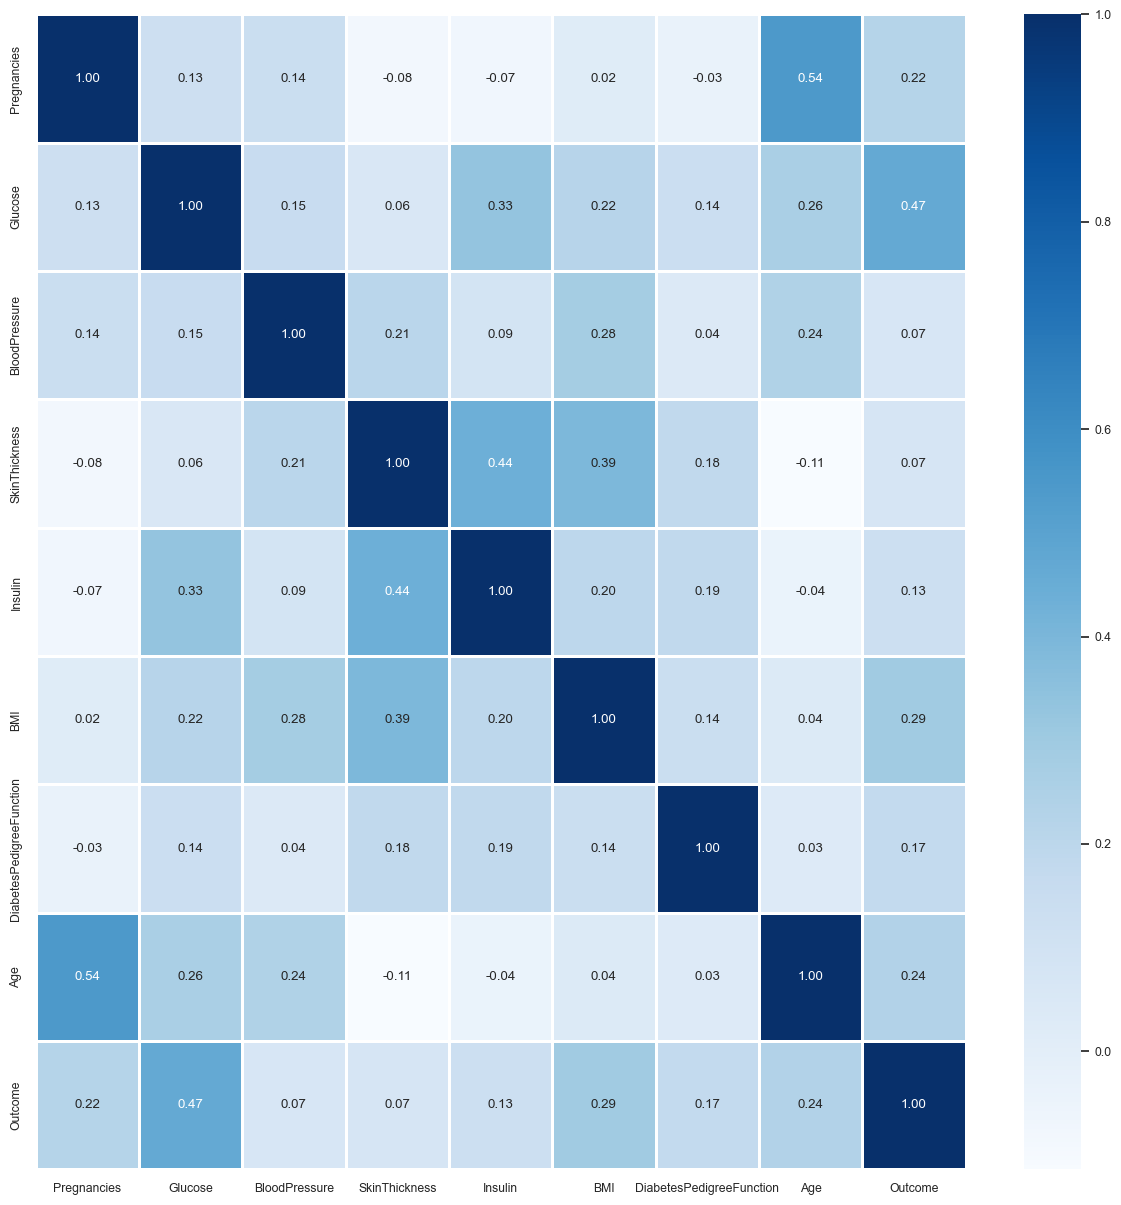

In [134]:
# Heatmap

df_corr=df.corr()
sns.set(font_scale=0.8)
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, cbar=True, linewidths=1.0, annot=True, fmt=".2f", cmap="Blues")
plt.show()

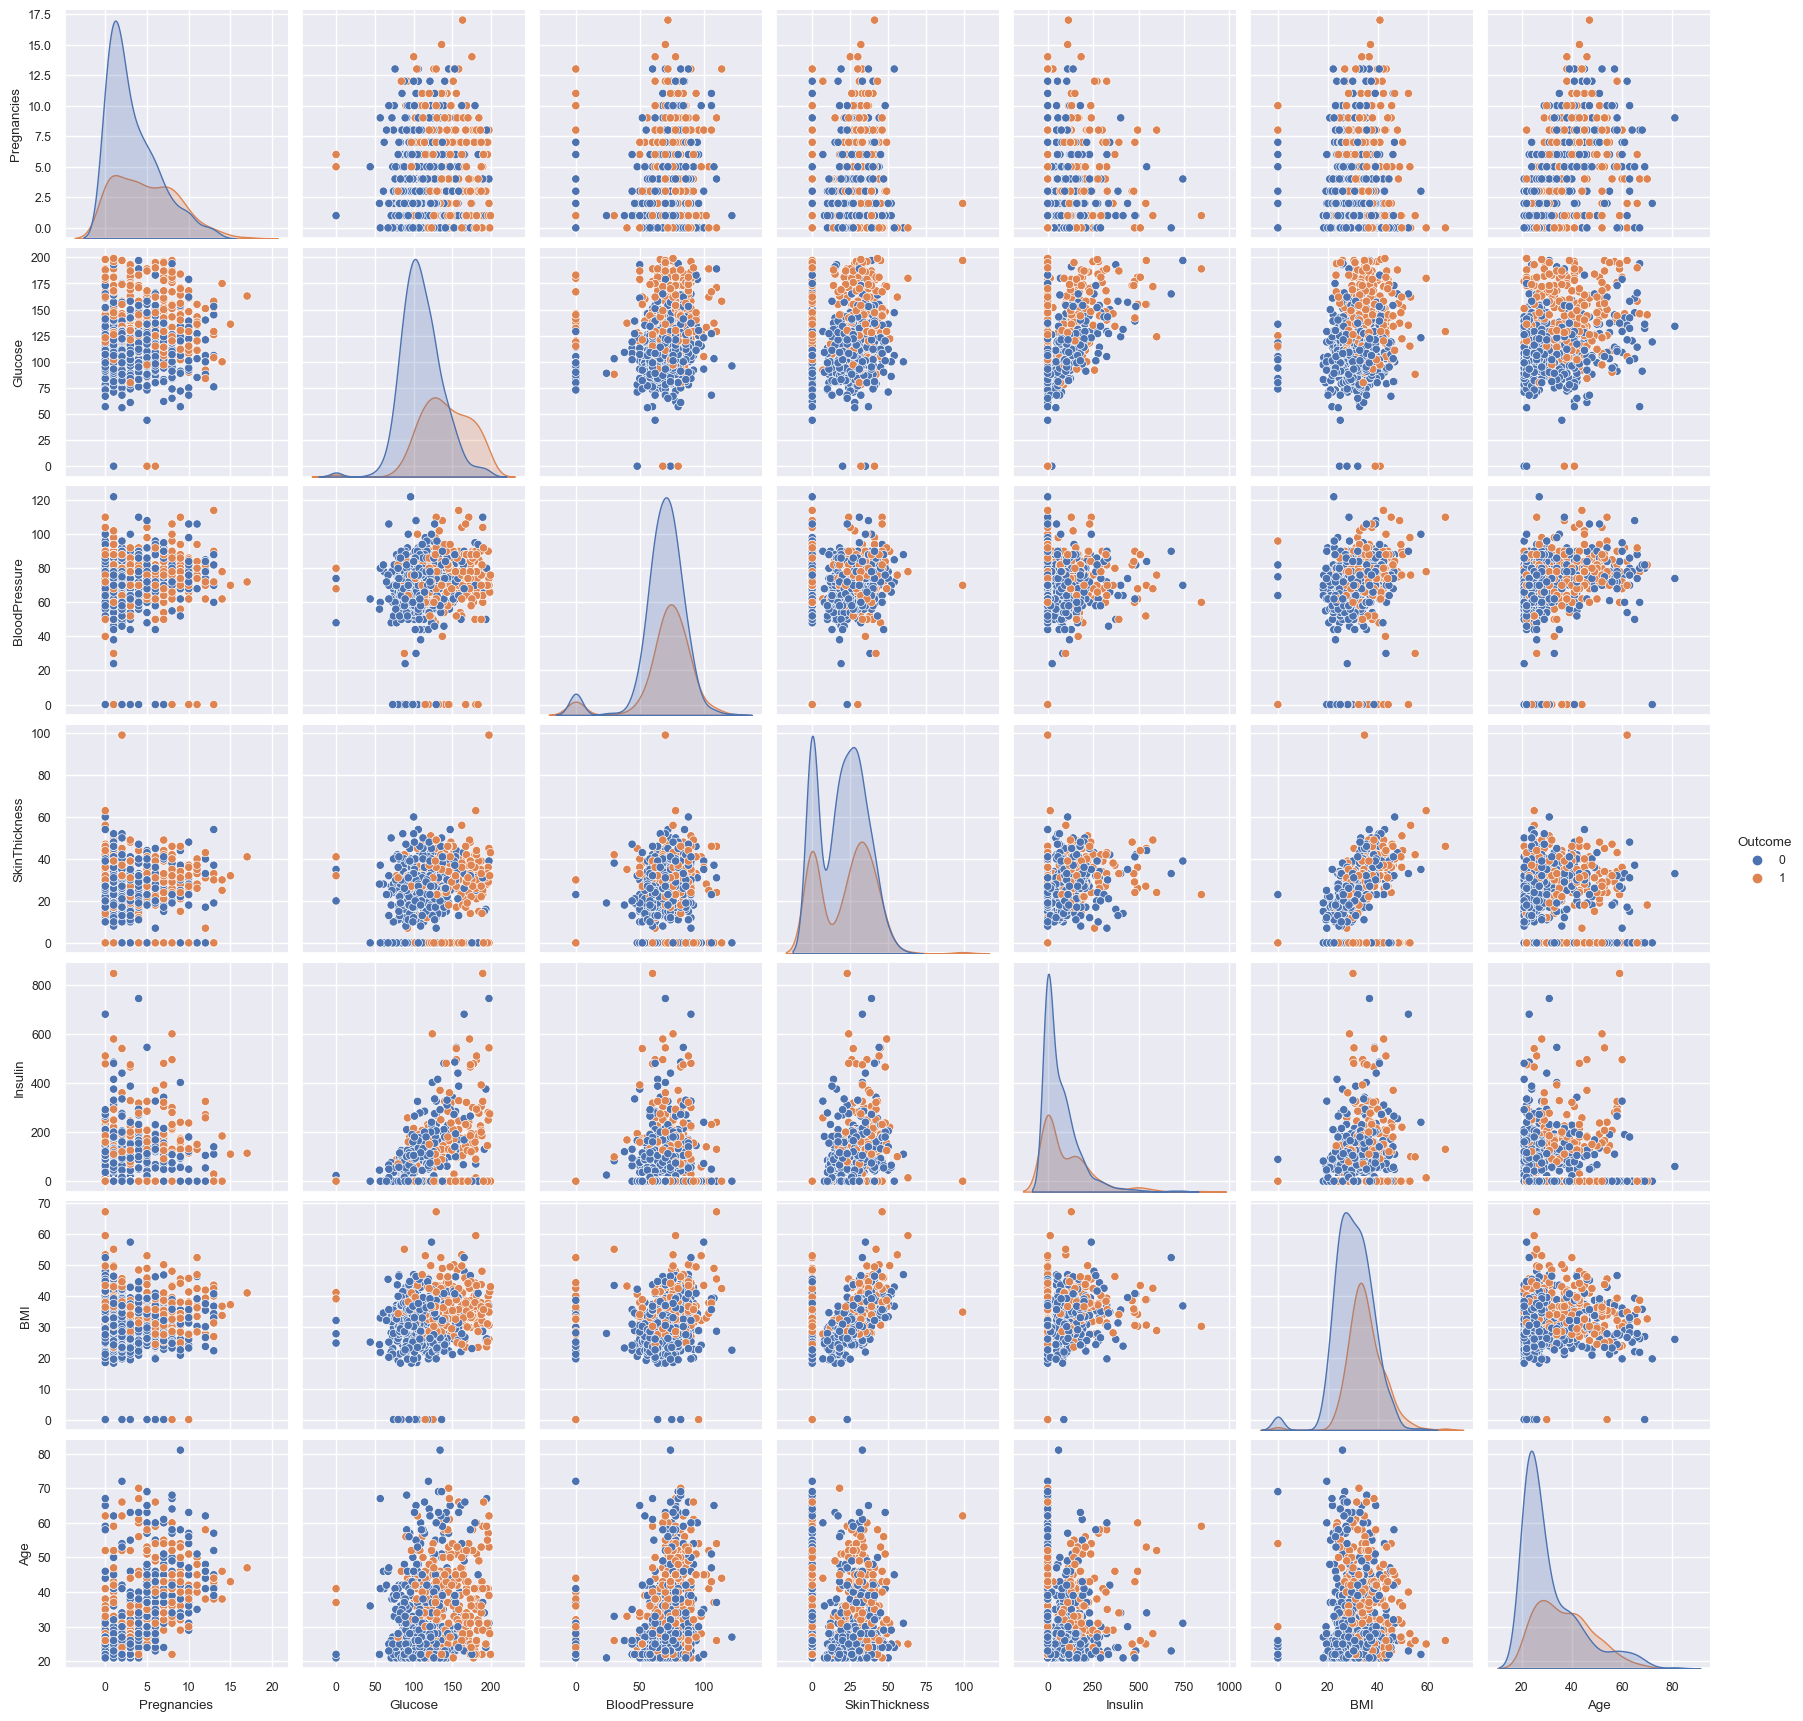

In [135]:
# EDA

sns.pairplot(df,
             vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'],
            hue ='Outcome')
plt.show()

In [136]:
# x,y data (for Classification)

x_data=df.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [137]:
y_data=df.loc[:, ['Outcome']]
y_data.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [138]:
# train & test set split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(576, 8) (576, 1)
(192, 8) (192, 1)


In [139]:
# Classification

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


--- SVM Classifier ---
0.7291666666666666
[[106  17]
 [ 35  34]]


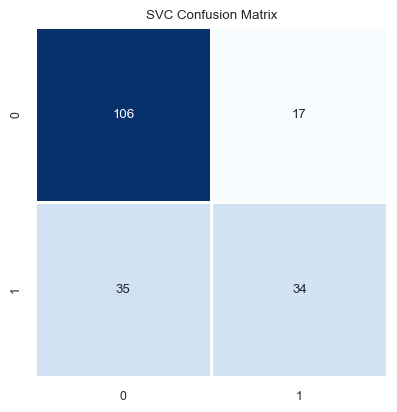

In [140]:
# SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)
pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

# confusion matrix

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("SVC Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_svm), cbar=False, linewidths=1.0, annot=True, fmt="d", cmap="Blues")
plt.show()


--- Decision Tree Classifier ---
0.6875
[[86 37]
 [23 46]]


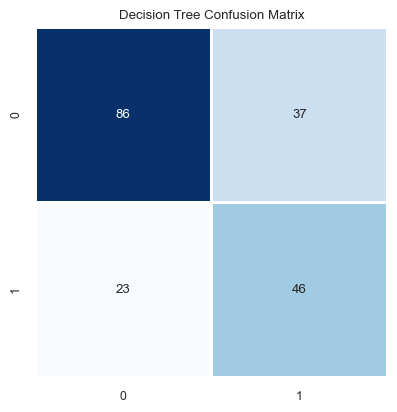

In [141]:
# DT

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)
pred_dt = clf_dt.predict(X_test)

print("\n--- Decision Tree Classifier ---")
print(accuracy_score(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))

# confusion matrix

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_dt), cbar=False, linewidths=1.0, annot=True, fmt="d", cmap="Blues")
plt.show()


--- Random Forest ---
0.75
[[99 24]
 [24 45]]


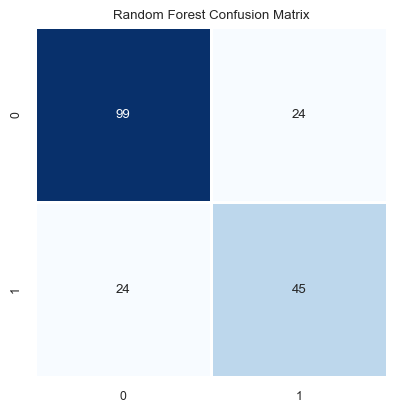

In [142]:
# RF

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)

print("\n--- Random Forest ---")
print(accuracy_score(y_test,pred_rf))
print(confusion_matrix(y_test, pred_rf))

# confusion matrix

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_rf), cbar=False, linewidths=1.0, annot=True, fmt="d", cmap="Blues")
plt.show()


--- Logistic Regression Classifier ---
0.7291666666666666
[[95 28]
 [24 45]]


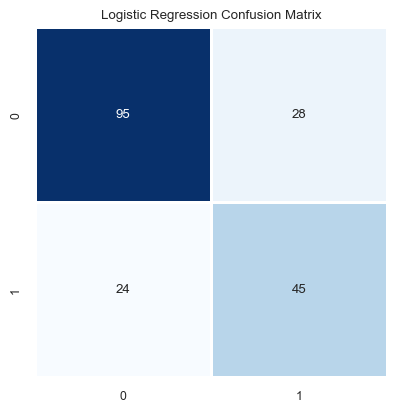

In [143]:
# LR

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)
pred_lr = clf_lr.predict(X_test)

print("\n--- Logistic Regression Classifier ---")
print(accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))

# confusion matrix

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_lr), cbar=False, linewidths=1.0, annot=True, fmt="d", cmap="Blues")
plt.show()

In [144]:
# DataFrame Copy

df2 = df.copy()
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [145]:
# x,y data (for Regression)

x=df2.loc[:, ['BMI']]
x.head()

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1


In [146]:
y=df2.loc[:, ['Glucose']]
y.head()

,Glucose
0,148
1,85
2,183
3,89
4,137


In [147]:
# train & test set split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(576, 1) (576, 1)
(192, 1) (192, 1)


In [148]:
# LinearRegression (coefficient, intercept)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("회귀계수(기울기):", np.round(lr.coef_, 1))
print("상수항(절편):", np.round(lr.intercept_, 1))

y_preds = lr.predict(X_test)

회귀계수(기울기): [[0.9]]
상수항(절편): [92.3]


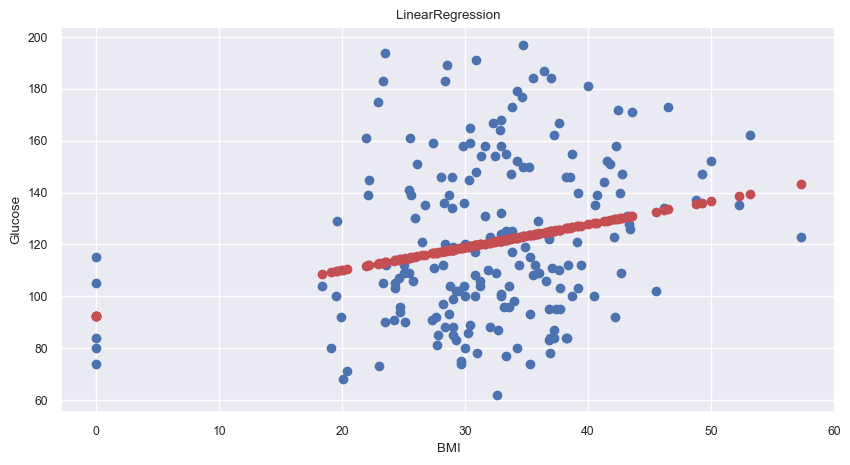

In [149]:
plt.figure(figsize=(10,5))
plt.title("LinearRegression")
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], y_preds, c='r', label='y_preds')
plt.show()

In [150]:
# MSE, RMSE

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 928.749, RMSE: 30.475
Variance score : 0.063


In [151]:
# Regression

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

평균제곱근오차 31.57382942251457


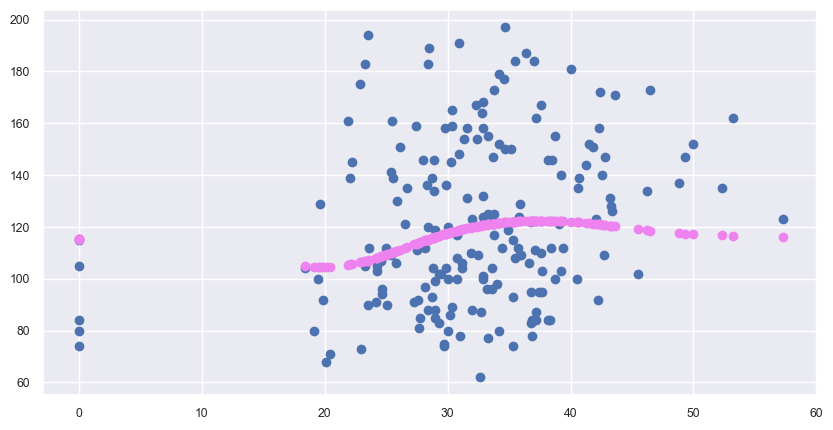

In [152]:
# SVR

model = SVR()
model.fit(X_train, y_train)

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], sy_preds, c='violet', label='sy_preds')
plt.show()

평균제곱근오차 36.28639375299131


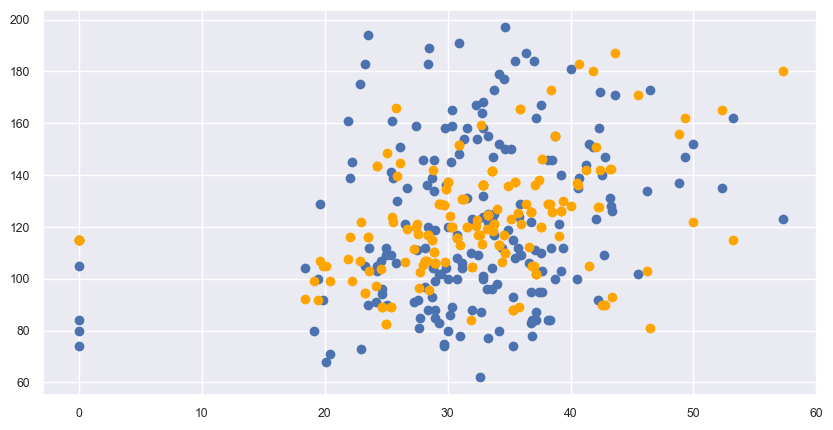

In [153]:
# DT

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], dy_preds, c='orange', label='dy_preds')
plt.show() 

평균제곱근오차 34.51448158996491


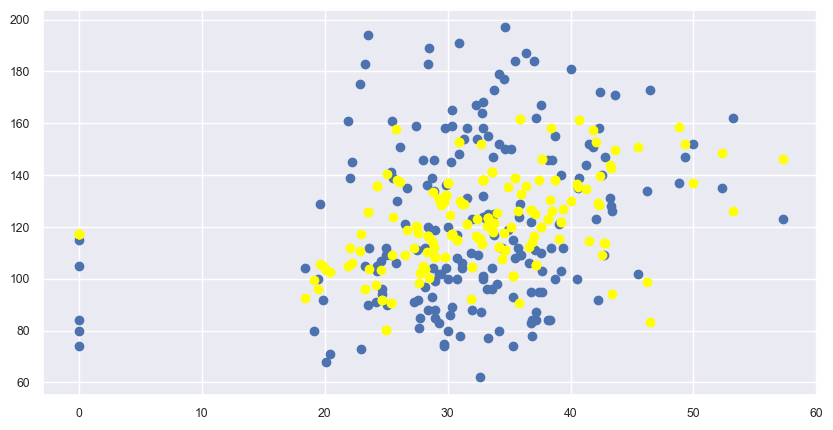

In [154]:
# RF

model = RandomForestRegressor()
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], ry_preds, c='yellow', label='ry_preds')
plt.show() 

평균제곱근오차 30.475375479523176


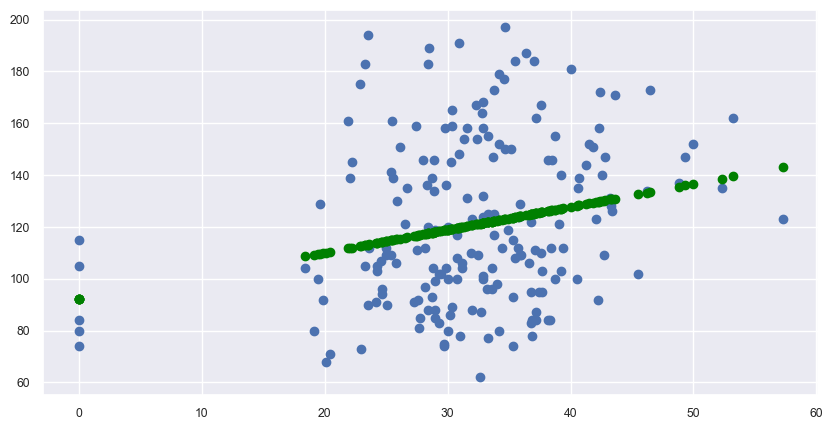

In [155]:
# LR

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

plt.figure(figsize=(10,5))
plt.scatter(X_test['BMI'], y_test, label='y_test')
plt.scatter(X_test['BMI'], ly_preds, c='green', label='ly_preds')
plt.show()